In [1]:
import math as m
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def S(basis) :
    N = basis.shape[0]
    Overlap_matrix = np.zeros((N,N))
    for p in range(N) :
        for q in range(p,N) :
            Overlap_matrix[p,q] = (np.pi/(basis[p] + basis[q]))**(3/2)
            Overlap_matrix[q,p] = Overlap_matrix[p,q]
    return Overlap_matrix

def T(basis) :
    N = basis.shape[0]
    Kintetic_matrix = np.zeros((N,N))
    for p in range(N) :
        for q in range(p,N) :
            Kintetic_matrix[p,q] = 3*basis[p]*basis[q]*np.pi**(3/2)/(basis[p] + basis[q])**(5/2)
            Kintetic_matrix[q,p] = Kintetic_matrix[p,q]
    return Kintetic_matrix

def A(basis) :
    N = basis.shape[0]
    Coulomb_matrix = np.zeros((N,N))
    for p in range(N) :
        for q in range(p,N) :
            Coulomb_matrix[p,q] = -2*np.pi/(basis[p] + basis[q])
            Coulomb_matrix[q,p] = Coulomb_matrix[p,q]
    return Coulomb_matrix

def Gaussian(alpha, r):
    return m.exp(-alpha*r**2)

In [3]:
def Hydrogen(a0,print_eigenfunction) :
    basis = np.array([a0])
    S_matrix = S(basis)
    T_matrix = T(basis)
    A_matrix = A(basis)

    eigenenergy, eigenfunction = eigh((T_matrix + A_matrix), S_matrix)
    eigenenergy = np.min(eigenenergy)
    if print_eigenfunction == 1 :
        eigenfunction = eigenfunction[:,np.argmin(eigenenergy)]
        print(eigenfunction)
    return eigenenergy

In [4]:
def GD(a0,step_size,limit) :
    gradient = (Hydrogen(a0+0.00001,0) - Hydrogen(a0,0))/0.00001
    i = 0
    data = np.array([[i],[Hydrogen(a0,0)],[a0],[gradient]])
    while i < limit and np.abs(gradient) > 0.00001:
        a0 = a0 - step_size*gradient 
        i += 1
        gradient = (Hydrogen(a0+0.00001,0) - Hydrogen(a0,0))/0.00001
        data = np.append(data,[[i],[Hydrogen(a0,0)],[a0],[gradient]], axis = 1)
    return data

def MGD(a0,step_size,limit) :
    gradient = (Hydrogen(a0+0.00001,0) - Hydrogen(a0,0))/0.00001
    v = 0
    i = 0
    data = np.array([[i],[Hydrogen(a0,0)],[a0],[gradient]])
    while i < limit and np.abs(gradient) > 0.00001:
        v = step_size*gradient + 0.9*v
        a0 = a0 - v
        i += 1
        gradient = (Hydrogen(a0+0.00001,0) - Hydrogen(a0,0))/0.00001
        data = np.append(data,[[i],[Hydrogen(a0,0)],[a0],[gradient]], axis = 1)
    return data

def NAG(a0,step_size,limit) :
    v = 0
    gradient = (Hydrogen(a0+0.00001,0) - Hydrogen(a0,0))/0.00001
    
    i = 0
    data = np.array([[i],[Hydrogen(a0,0)],[a0],[gradient]])
    while i < limit and np.abs(gradient) > 0.00001:
        v = step_size*gradient + 0.9*v
        a0 = a0 - v
        i += 1
        gradient = (Hydrogen(a0+0.00001-v,0) - Hydrogen(a0-v,0))/0.00001
        data = np.append(data,[[i],[Hydrogen(a0,0)],[a0],[gradient]], axis = 1)
    return data

[ 1.00000000e+03 -4.23220285e-01  3.13738303e-01  7.55315673e-02]


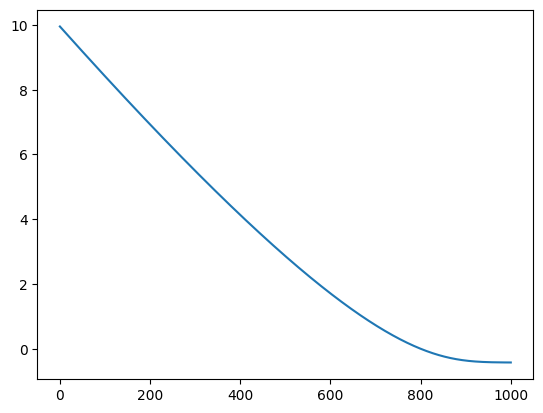

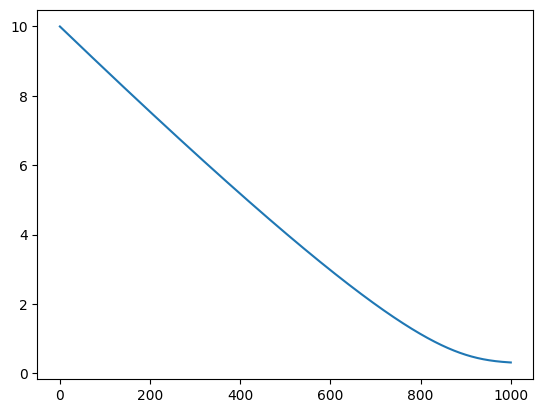

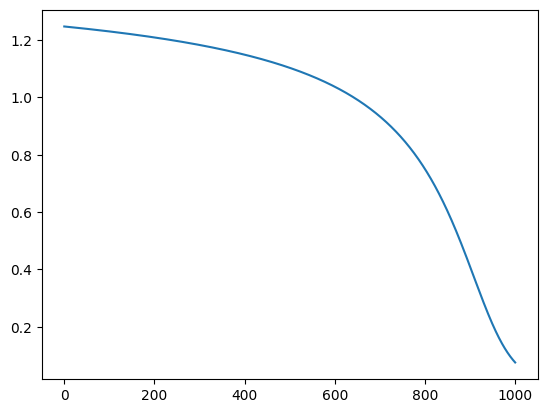

In [5]:
test1= GD(10,0.01,1000)
for ele in range(1,4) :
    plt.figure(ele)
    plt.plot(test1[0,:],test1[ele,:])

print(test1[:,-1])

[ 2.51000000e+02 -4.24413182e-01  2.82940634e-01  9.31108524e-06]


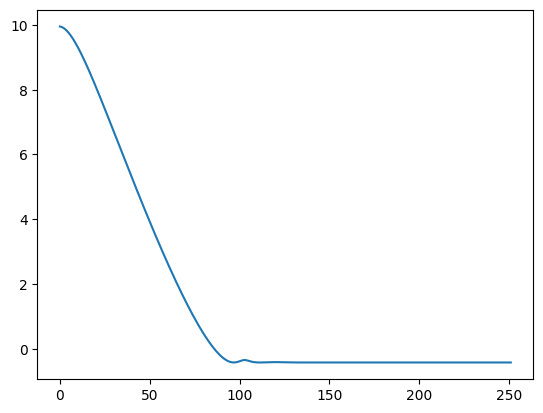

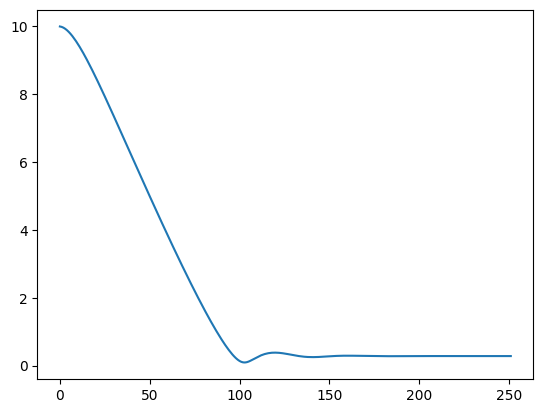

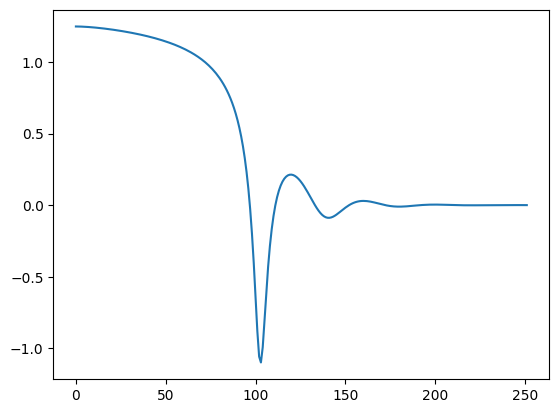

In [6]:
test2= MGD(10,0.01,1000)
for ele in range(1,4) :
    plt.figure(ele)
    plt.plot(test2[0,:],test2[ele,:])

print(test2[:,-1])

[ 2.35000000e+02 -4.24413181e-01  2.82929698e-01 -8.65423289e-06]


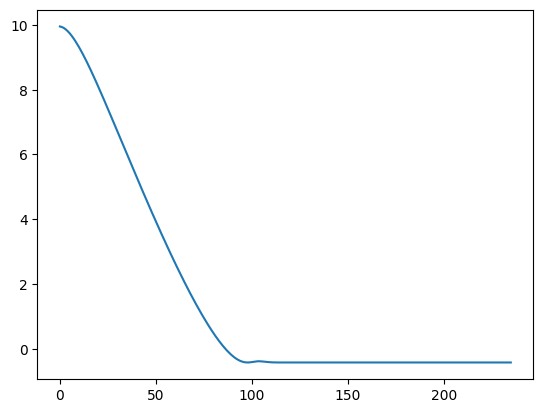

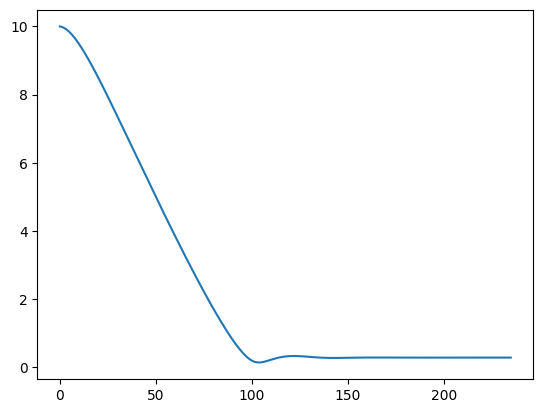

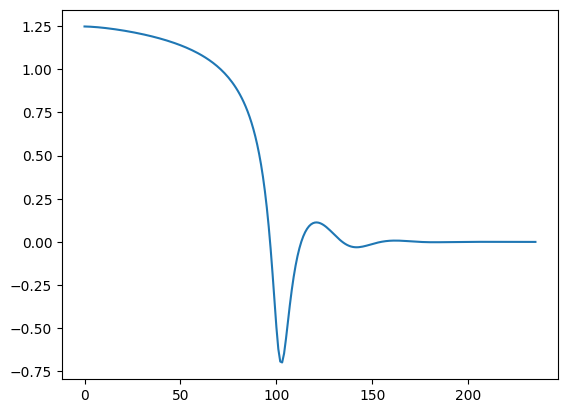

In [7]:
test3= NAG(10,0.01,1000)
for ele in range(1,4) :
    plt.figure(ele)
    plt.plot(test3[0,:],test3[ele,:])

print(test3[:,-1])